<a href="https://colab.research.google.com/github/NhatCaoVan/Classification-Fashion-Product/blob/main/Classification_Fashion_Product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content/drive/My Drive/Model Classification Fashion Product'

In [ ]:
cd/content/drive/MyDrive/Model Classification Fashion Product

/content/drive/MyDrive/Model Classification Fashion Product


In [ ]:
!pwd

/content/drive/MyDrive/Model Classification Fashion Product


In [ ]:
!pip install keras.utils 

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=0ab7ee4122d2d25efe1bf1cb9ad4cfa6a70830325e45cc9d24d932424a3a964a
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
train_dir = "/content/drive/MyDrive/Data___/Train_set"
val_dir ="/content/drive/MyDrive/Data___/Validation_set"

In [ ]:
batch_size = 32
img_height = 90
img_width = 90

In [ ]:
data_dir = "/content/drive/MyDrive/Model Classification Fashion Product/Divide_data"

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 32641 files belonging to 20 classes.
Using 26113 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 32641 files belonging to 20 classes.
Using 6528 files for validation.


In [ ]:
# You can find the class names in the class_names attribute on these datasets.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Backpacks', 'Belts', 'Briefs', 'Casual_Shoes', 'Formal_Shoes', 'Handbags', 'Heels', 'Jeans', 'Kurtas', 'Sandals', 'Shirt', 'Shorts', 'Socks', 'Sports_Shoes', 'Sunglasses', 'Tops', 'Trousers', 'Tshirt', 'Wallets', 'Watches']


In [ ]:
# Visualize the data

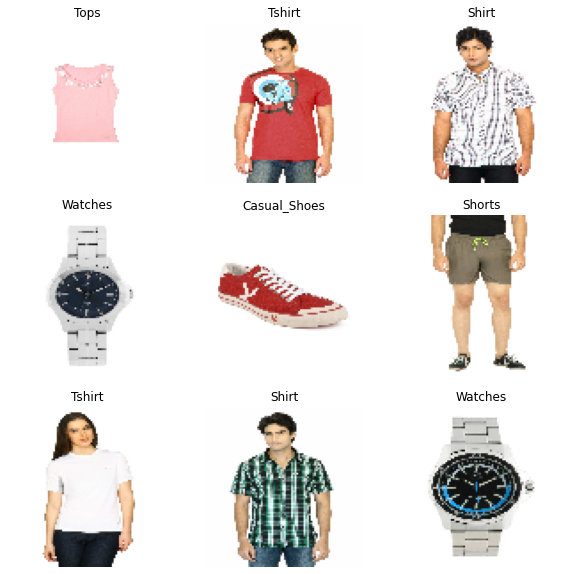

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 90, 90, 3)
(32,)


In [ ]:
labels_batch.shape

TensorShape([32])

In [ ]:
#Standardize the data

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
#There are two ways to use this layer. You can apply it to the dataset by calling map:

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import glob 
import os 
import cv2
import math
from keras import applications
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
#from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
###

In [ ]:
shape = (img_height, img_width, 3)


In [ ]:

# Convolution Neural Networks (CNN)
model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3), padding='same', input_shape = (shape)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Conv2D(16, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(20))
model.add(Activation("softmax"))
# model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 8)       224       
_________________________________________________________________
activation_17 (Activation)   (None, 100, 100, 8)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 33, 33, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 16)        1168      
_________________________________________________________________
batch_normalization_13 (Batc (None, 33, 33, 16)        64        
_________________________________________________________________
activation_18 (Activation)   (None, 33, 33, 16)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)       

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


818/818 [==============================] - 4774s 6s/step - loss: 1.1926 - accuracy: 0.6362 - val_loss: 0.4820 - val_accuracy: 0.8352
Epoch 2/10
818/818 [==============================] - 638s 775ms/step - loss: 0.4213 - accuracy: 0.8560 - val_loss: 0.5589 - val_accuracy: 0.8046
Epoch 3/10
818/818 [==============================] - 627s 762ms/step - loss: 0.3414 - accuracy: 0.8784 - val_loss: 0.3769 - val_accuracy: 0.8664
Epoch 4/10
818/818 [==============================] - 651s 792ms/step - loss: 0.2923 - accuracy: 0.8999 - val_loss: 0.4844 - val_accuracy: 0.8281
Epoch 5/10
818/818 [==============================] - 654s 795ms/step - loss: 0.2568 - accuracy: 0.9090 - val_loss: 0.3713 - val_accuracy: 0.8717
Epoch 6/10
818/818 [==============================] - 658s 800ms/step - loss: 0.2281 - accuracy: 0.9156 - val_loss: 0.4156 - val_accuracy: 0.8635
Epoch 7/10
818/818 [==============================] - 661s 803ms/step - loss: 0.2047 - accuracy: 0.9265 - val_loss: 0.7788 - val_accuracy

In [ ]:
#model.save("Model4.h5")

In [ ]:
saved_model = tf.keras.models.load_model("Model4.h5")

In [ ]:
## Data agu

In [ ]:
import keras
from tensorflow.keras import layers

In [ ]:
print(val_ds.take(1))

<TakeDataset shapes: ((None, 90, 90, 3), (None,)), types: (tf.float32, tf.int32)>


In [ ]:
import keras

In [ ]:
import numpy as np

[[1.8921281e-05 2.4000515e-09 1.3061655e-05 6.8571643e-07 7.5818614e-09
  4.3495777e-03 1.6996174e-09 3.1933081e-11 1.5717528e-11 9.9653148e-09
  6.3057914e-06 9.4356845e-10 1.8730674e-08 5.2322117e-03 5.8957988e-10
  3.1552721e-05 4.6637628e-11 1.2598252e-03 4.7045809e-12 9.8908782e-01]]
Watches


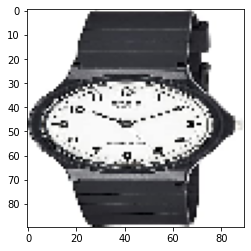

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/61oxg5AsJrL._AC_UY550_.jpg", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[2.06610560e-03 1.00436796e-06 1.55555693e-08 4.12821464e-06
  7.49837026e-10 3.37614547e-05 5.87488991e-08 1.08027685e-04
  4.09201486e-03 4.21795676e-07 4.67698352e-04 4.83975746e-04
  1.31994989e-06 2.75857328e-03 1.48301676e-10 1.02462154e-03
  4.89087688e-05 3.99152632e-04 1.91151006e-09 9.88510311e-01]]
Watches


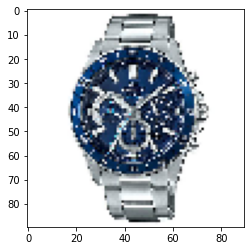

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/watchtest.jpg", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[1.6703255e-07 1.6960231e-12 1.3567347e-06 6.1615338e-11 2.1715432e-13
  5.3497380e-09 5.2405979e-15 3.4049701e-14 3.7189826e-12 1.3752897e-09
  1.7888379e-08 3.8850208e-12 3.6613184e-08 1.6232241e-10 6.4872314e-18
  3.4246048e-06 1.4235130e-10 9.9998724e-01 4.3460962e-13 7.7820823e-06]]
Tshirt


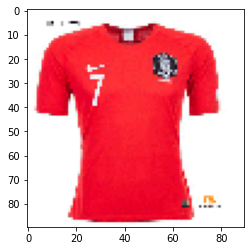

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/t_s1.gif", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[8.06423544e-04 4.17221258e-07 6.28224188e-06 6.69886637e-03
  3.76927483e-06 1.08723485e-04 2.68427801e-04 2.10912399e-09
  1.05345848e-08 3.08269082e-05 2.38187443e-08 8.55800010e-07
  1.78812911e-07 9.91064668e-01 3.02049358e-10 4.81938805e-05
  8.17123862e-08 6.82630751e-04 2.26503243e-08 2.79622967e-04]]
Sports_Shoes


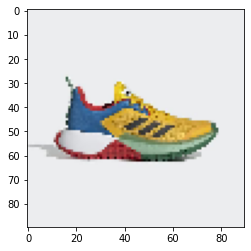

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/adidas_x_LEGO(r)_Sport_Shoes_Yellow_FY8439_01_standard.jpg", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[3.8189122e-01 4.8852334e-04 2.5394860e-01 1.5037049e-03 9.5751951e-05
  1.0572016e-01 8.4044109e-04 2.2531236e-05 4.8493622e-03 1.0284155e-02
  7.6608472e-03 5.4432964e-03 6.2175503e-05 1.9748183e-02 7.2476141e-09
  1.1704548e-01 2.3609167e-03 8.1689060e-02 5.7031000e-03 6.4254907e-04]]
Backpacks


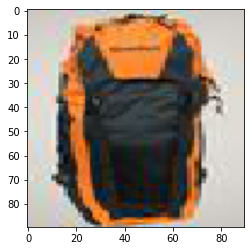

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/1556.jpg", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[9.76491511e-01 2.27106405e-08 4.07559533e-08 5.13944542e-07
  1.76551981e-10 1.99114493e-05 9.98886776e-07 1.97921668e-06
  1.93893667e-02 1.33609660e-07 4.64130972e-05 8.93382094e-06
  1.04602805e-04 3.50040182e-07 8.87196187e-13 2.15727766e-03
  5.15471154e-04 1.17905589e-03 4.54555402e-06 7.87691170e-05]]
Backpacks


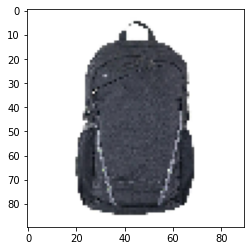

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/balo4.jpg", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[2.9282194e-01 3.4641146e-06 3.5857417e-02 2.3727352e-03 4.2272227e-06
  1.4322361e-02 1.8972688e-03 6.6402910e-04 3.6475141e-02 2.0908775e-04
  1.1773363e-02 2.7696497e-03 2.3898401e-03 9.0562324e-05 1.5130405e-08
  1.3141091e-01 7.0269551e-04 4.1137010e-01 7.7707780e-05 5.4787580e-02]]
Tshirt


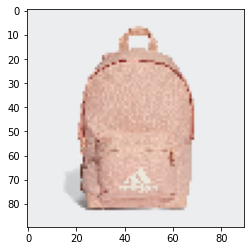

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/balo003.jpg", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[2.1343978e-01 8.3295555e-07 3.1467807e-06 2.7646179e-06 1.3858999e-08
  9.7779708e-04 2.5644888e-05 1.2948053e-06 3.9360751e-03 3.5942321e-05
  2.3834340e-03 1.4423118e-05 7.9667407e-05 1.6520469e-05 1.2396118e-12
  3.8166179e-03 3.1152335e-03 7.6431209e-01 2.0135557e-03 5.8250609e-03]]
Tshirt


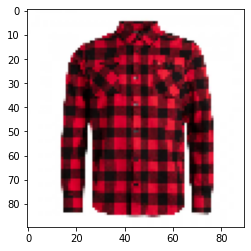

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/s1.jpg", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[4.23130859e-03 3.17448894e-08 4.86786594e-04 7.55994624e-05
  1.20931345e-05 3.78525787e-04 4.25672886e-04 9.06448185e-01
  4.36346483e-07 4.55672925e-05 8.09223484e-03 1.20491199e-02
  6.31155854e-04 2.85543920e-05 8.86947671e-09 6.77667616e-04
  6.16630428e-02 4.29044385e-03 1.63795034e-04 2.99713429e-04]]
Jeans


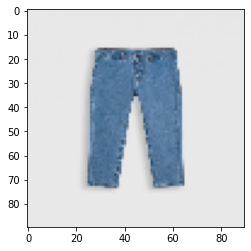

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/1bj20w005-sj592-110-.jpg", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[5.7065929e-04 3.3132669e-06 4.6581185e-01 3.0211287e-03 8.1496029e-05
  5.2205544e-02 4.9228769e-05 6.3798070e-02 4.1901178e-05 3.9745879e-04
  7.2487310e-04 4.9738982e-03 8.7591703e-05 1.2964770e-01 1.0504869e-10
  3.8662549e-02 1.0291620e-02 2.2889099e-01 1.0154277e-04 6.3866266e-04]]
Briefs


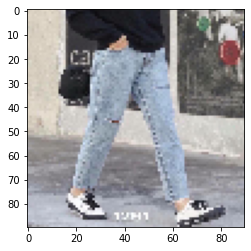

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/jeantest.jpg", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[4.90686484e-03 9.16536374e-04 7.53641501e-03 1.59832805e-08
  1.00506611e-07 5.17479703e-02 2.47156531e-05 6.53936388e-03
  5.18969937e-05 7.79669062e-05 2.64842110e-03 7.76385069e-01
  7.66773941e-04 3.40670173e-04 1.96235339e-09 2.02780287e-03
  1.48744684e-05 2.06803847e-02 1.83182396e-03 1.23502456e-01]]
Shorts


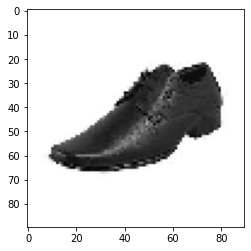

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/formalshoe.jfif", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[1.06948067e-03 2.31759056e-08 1.62014330e-03 1.39167796e-07
  9.97588678e-11 8.22014332e-01 9.14782972e-10 1.00734439e-07
  2.13721182e-06 9.26779862e-08 1.97156652e-07 1.01189961e-07
  4.01862508e-07 4.13238769e-04 2.05411697e-16 2.73392629e-02
  1.09613595e-07 1.47535890e-01 2.47019580e-06 1.83082807e-06]]
Handbags


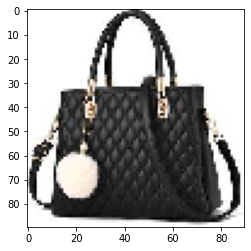

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/handbag.jfif", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

[[2.45278212e-03 1.10636744e-08 1.34025686e-04 2.37452269e-07
  5.69697090e-09 7.41276070e-02 2.32147863e-06 6.15865574e-05
  5.32044346e-08 7.91872196e-07 1.08543005e-04 1.60871095e-05
  7.46371325e-06 5.61308354e-07 5.37192832e-08 4.53312736e-04
  2.18968034e-06 4.30974504e-03 3.84939440e-08 9.18322623e-01]]
Watches


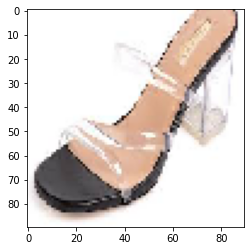

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/Heels1.jfif", target_size=shape )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

**MODEL 2**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape = (shape)))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Dense(20))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)       

In [ ]:
epochs =10
# epoch
# Steps

batch_size = 64

In [ ]:
learning_rate = 0.01

In [ ]:
opt = SGD(learning_rate= learning_rate, momentum=0.9)

In [ ]:
model.compile(optimizer='adagrad', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
818/818 [==============================] - 531s 644ms/step - loss: 0.3392 - accuracy: 0.8876 - val_loss: 0.4044 - val_accuracy: 0.8625
Epoch 2/10
818/818 [==============================] - 538s 654ms/step - loss: 0.3033 - accuracy: 0.9004 - val_loss: 0.3887 - val_accuracy: 0.8657
Epoch 3/10
818/818 [==============================] - 534s 649ms/step - loss: 0.2721 - accuracy: 0.9123 - val_loss: 0.3783 - val_accuracy: 0.8700
Epoch 4/10
818/818 [==============================] - 544s 661ms/step - loss: 0.2482 - accuracy: 0.9216 - val_loss: 0.3713 - val_accuracy: 0.8697
Epoch 5/10
818/818 [==============================] - 535s 650ms/step - loss: 0.2311 - accuracy: 0.9276 - val_loss: 0.3674 - val_accuracy: 0.8729
Epoch 6/10
818/818 [==============================] - 533s 648ms/step - loss: 0.2123 - accuracy: 0.9352 - val_loss: 0.3652 - val_accuracy: 0.8769
Epoch 7/10
818/818 [==============================] - 531s 645ms/step - loss: 0.1974 - accuracy: 0.9404 - val_loss: 0.3603 -

In [ ]:
#model.save("model6.h5")

In [ ]:
saved_model1 = tf.keras.models.load_model("model5.h5")

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Model Classification Fashion Product/test_picture/handbag.jfif", target_size=shape 
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = saved_model1.predict(img_array)
print(predictions)
index = np.argmax(predictions)
print(class_names[index])
plt.imshow(img)

ValueError: ignored

In [ ]:
import socket
import threading

def send(msg):
    client.send(str(len(msg)).encode('utf-8').ljust(64))
    client.send(msg.encode('utf-8'))

client = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
client.connect((socket.gethostbyname(socket.gethostname()), 5050))

send("Hello world!")

**MODEL 3**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape = (shape)))
# model.add(Conv2D(32, (3, 3), padding="same", input_shape = shape))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Dense(20))
model.add(Activation("softmax"))
# model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)       

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


817/817 [==============================] - 3858s 5s/step - loss: 0.6368 - accuracy: 0.7895 - val_loss: 0.5234 - val_accuracy: 0.8151
Epoch 2/10
384/817 [=============>................] - ETA: 25:01 - loss: 0.3645 - accuracy: 0.8702

KeyboardInterrupt: ignored